In [170]:
import pandas as pd 
import plotly.express as px

import os 

os.getcwd()

'/Users/dinizjp/Programação /Projetos /Projeto SYS/dados'

In [211]:
df = pd.read_csv('Visitas à Página e ao perfil.csv', sep=';')

df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

df


,Data,Seguidores do Instagram
0,2021-04-24,1463
1,2021-04-25,1608
2,2021-04-26,1730
3,2021-04-27,1443
4,2021-04-28,1456
...,...,...
726,2023-04-20,488
727,2023-04-21,462
728,2023-04-22,390
729,2023-04-23,522


# Média de visitas por mês durante o periodo de 2021 a 2023

In [209]:
df_grouped = df.groupby(pd.Grouper(key='Data', freq='M')).mean().reset_index()

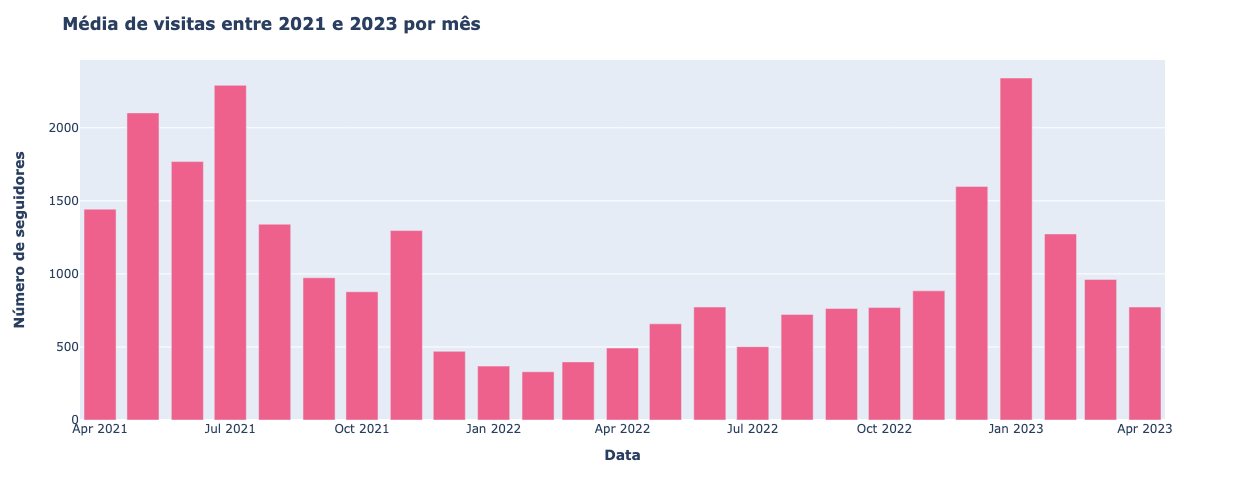

In [215]:
# Criar uma nova coluna com o primeiro dia de cada mês
df_grouped['Data_inicio_mes'] = pd.to_datetime(df_grouped['Data'].dt.year.astype(str) + '-' +
                                               df_grouped['Data'].dt.month.astype(str) + '-01')

fig = px.bar(df_grouped, x='Data_inicio_mes', y='Seguidores do Instagram', 
            width=1280,
            height=500,
            color_discrete_sequence=['#ED618C'])

fig.update_layout(
    title="<b>Média de visitas entre 2021 e 2023 por mês  <b>",
    xaxis_title="<b>Data<b>",
    yaxis_title="<b>Número de seguidores<b>"
)

fig.update_xaxes(
    tickformat="%b %Y"
)
fig.show()



# Quantidade de visitas por dia durante os periodos de 2021/2022 e 2022/2023

In [206]:
df_periodo1 = df[(df['Data'] >= '2021-04-24') & (df['Data'] <= '2022-04-24')]

df_periodo2 = df[(df['Data'] >= '2022-04-25') & (df['Data'] <= '2023-04-24')]

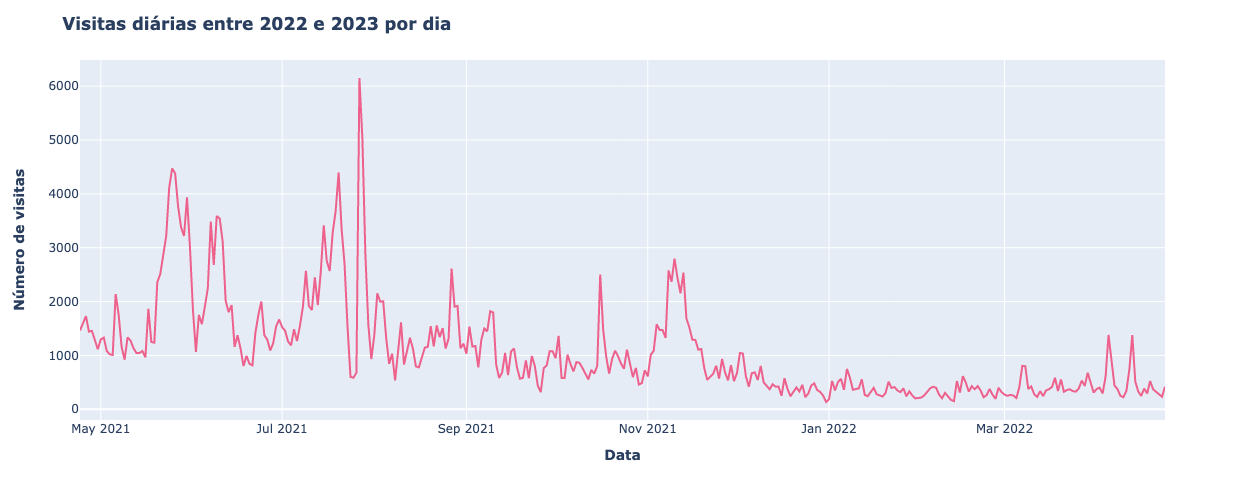

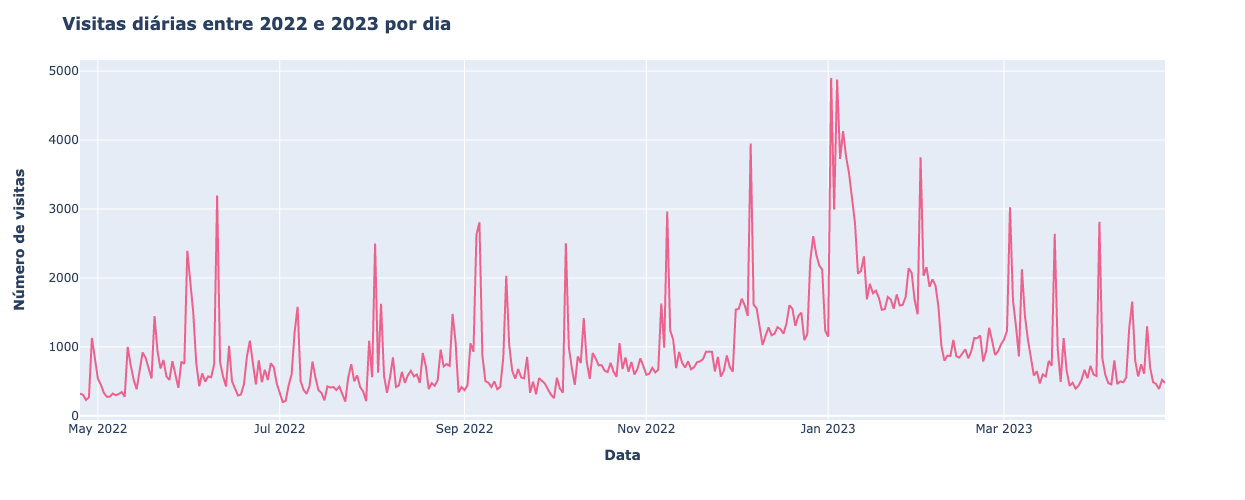

In [216]:


fig1 = px.line(df_periodo1, x='Data', y='Seguidores do Instagram',
               width=1280, height=500,
               color_discrete_sequence=['#ED618C'],
              )


fig1.update_layout(
    title="<b>Visitas diárias entre 2022 e 2023 por dia  <b>",
    xaxis_title="<b>Data<b>",
    yaxis_title="<b>Número de visitas<b>"
)


fig2 = px.line(df_periodo2, x='Data', y='Seguidores do Instagram',
               width=1280, height=500,
               color_discrete_sequence=['#ED618C'],
              )

fig2.update_layout(
    title="<b>Visitas diárias entre 2022 e 2023 por dia  <b>",
    xaxis_title="<b>Data<b>",
    yaxis_title="<b>Número de visitas<b>"
)


fig1.show()
fig2.show()